<a href="https://colab.research.google.com/github/suhyeon0325/multicamp34/blob/main/%ED%86%B5%EA%B3%84%EB%B3%B5%EC%8A%B5_240114.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving amir_deals.csv to amir_deals.csv


In [5]:
import pandas as pd
amir_deals = pd.read_csv('amir_deals.csv')
amir_deals

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17
...,...,...,...,...,...,...
173,174,Product A,Current,Lost,5835.32,23
174,175,Product D,Current,Won,6377.50,12
175,176,Product D,Current,Won,3537.61,28
176,177,Product A,Current,Won,6448.07,34


In [6]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64


In [9]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()

# Calculate probability of picking a deal with each product
probs = counts / amir_deals.shape[0]
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


In [10]:
import numpy as np

# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


In [11]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
162         163  Product D  Current    Won  6755.66         59
131         132  Product B  Current    Won  6872.29         25
87           88  Product C  Current    Won  3579.63          3
145         146  Product A  Current    Won  4682.94         63
145         146  Product A  Current    Won  4682.94         63


In [14]:
import pandas as pd

# 데이터프레임 생성
restaurant_groups = pd.DataFrame({
    'group_id': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'group_size': [2, 4, 6, 2, 2, 2, 3, 2, 4, 2]
})

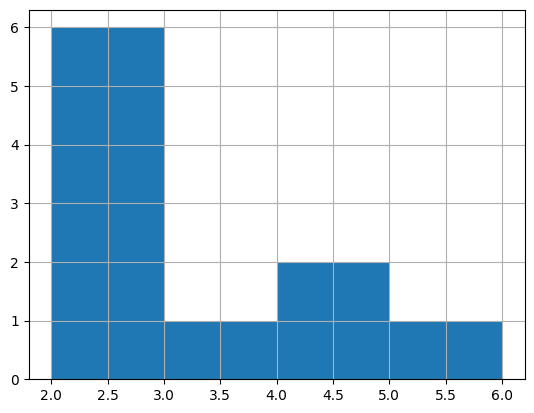

In [15]:
import matplotlib.pyplot as plt
# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins=np.linspace(2,6,5))
plt.show()

In [16]:
# Create probability distribution
size_dist = restaurant_groups['group_size'] / restaurant_groups.shape[0]

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

print(size_dist)

   group_size  prob
0           0   0.2
1           1   0.4
2           2   0.6
3           3   0.2
4           4   0.2
5           5   0.2
6           6   0.3
7           7   0.2
8           8   0.4
9           9   0.2


In [17]:
# Calculate expected value
expected_value = sum(size_dist['group_size'] * size_dist['prob'])
print(expected_value)

12.200000000000001


In [18]:
# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more['prob'])
print(prob_4_or_more)

1.4999999999999998


In [19]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

In [20]:
# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, 0, 30)
print(prob_less_than_5)

0.16666666666666666


In [21]:
# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = uniform.cdf(30, 0, 30) - uniform.cdf(5, 0, 30)
print(prob_greater_than_5)

0.8333333333333334


In [22]:
# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, 0, 30) - uniform.cdf(10, 0, 30)
print(prob_between_10_and_20)

0.3333333333333333


In [23]:
# Set random seed to 334
np.random.seed(334)

In [24]:
# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

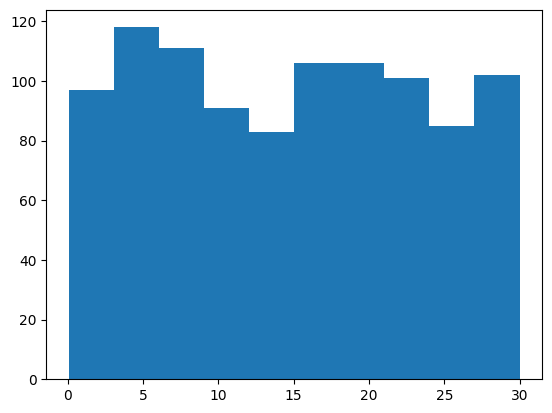

In [25]:
# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

In [26]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

In [27]:
# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))

[1]


In [28]:
# Simulate 1 week of 3 deals
print(binom.rvs(3, 0.3, size = 1))

[0]


In [29]:
# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size=52)

# Print mean deals won per week
print(np.mean(deals))

0.8461538461538461


In [30]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)

print(prob_3)

0.026999999999999996


In [31]:
# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)

print(prob_less_than_or_equal_1)

0.784


In [32]:
# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)

print(prob_greater_than_1)

0.21599999999999997


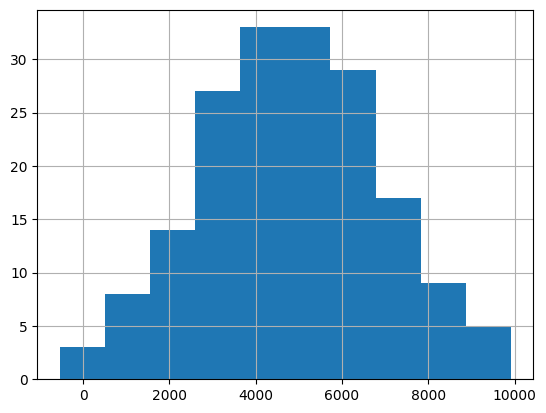

In [33]:
# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins=10)
plt.show()

In [34]:
from scipy.stats import norm

# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)

print(prob_less_7500)

0.8943502263331446


In [35]:
# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)

print(prob_over_1000)

0.9772498680518208


In [36]:
# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)

print(prob_3000_to_7000)

0.6826894921370859


In [37]:
# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)

print(pct_25)

3651.0204996078364


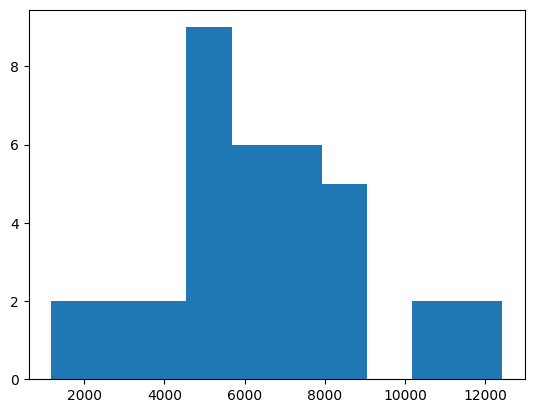

In [38]:
# Calculate new average amount
new_mean = 5000 * 1.2

# Calculate new standard deviation
new_sd = 2000 * 1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size=36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

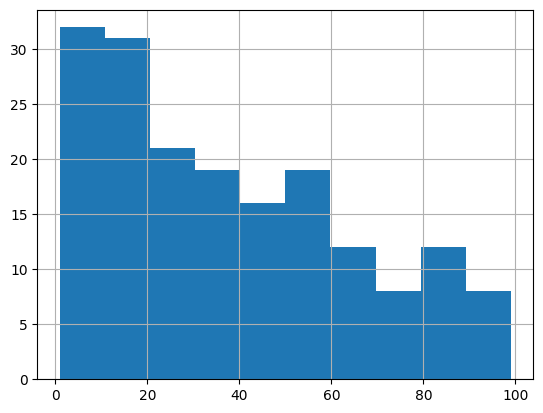

In [39]:
# Create a histogram of num_users and show
amir_deals['num_users'].hist()
plt.show()